In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the dataset
# Replace 'your_dataset_path' with the actual path to your dataset
data = pd.read_csv('/content/drive/MyDrive/bot iot/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [7]:


# Find unique values in the 'churn' column
unique_iteam = data['Churn'].unique()

# Print the unique values
print(unique_iteam)


['No' 'Yes']


In [8]:
# Count occurrences of each unique value in the 'churn' column
iteam_counts = data['Churn'].value_counts()

# Print the counts of each unique value
print(iteam_counts)

Churn
No     5174
Yes    1869
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:09:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


             Feature  Importance
15          Contract    0.425193
8    InternetService    0.085406
9     OnlineSecurity    0.072992
6       PhoneService    0.040657
12       TechSupport    0.035460
14   StreamingMovies    0.031645
5             tenure    0.030839
16  PaperlessBilling    0.026091
7      MultipleLines    0.025366
18    MonthlyCharges    0.024805


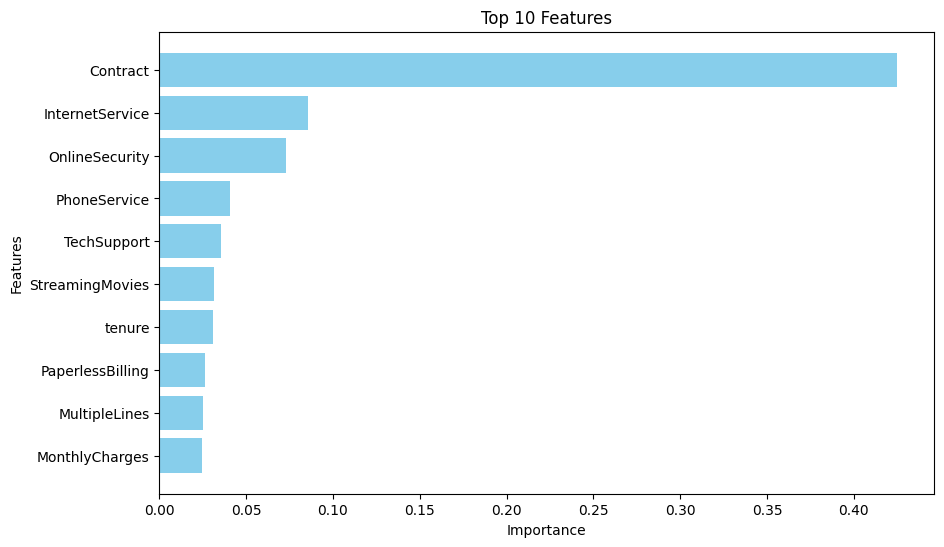

In [13]:
# Import libraries
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Encode all categorical features using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


# Split dataset into features (X) and target (y)
X = data.drop(columns=['Churn'])  # Replace 'target_column' with your actual target column
y = data['Churn']

# Encode target labels to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Get the top 10 features
top_10_features = importance_df.head(10)

# Display top 10 features
print(top_10_features)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Features')
plt.gca().invert_yaxis()
plt.show()

In [14]:


# List of columns to drop
columns_to_drop = [
    'TotalCharges', 'DeviceProtection', 'Partner', 'gender', 'StreamingTV'
]

# Drop the unnecessary columns
data_cleaned = data.drop(columns=columns_to_drop)

# Optionally, print the cleaned dataset shape and the first few rows
print(data_cleaned.shape)
print(data_cleaned.head())


(7043, 16)
   customerID  SeniorCitizen  Dependents  tenure  PhoneService  MultipleLines  \
0        5375              0           0       1             0              1   
1        3962              0           0      34             1              0   
2        2564              0           0       2             1              0   
3        5535              0           0      45             0              1   
4        6511              0           0       2             1              0   

   InternetService  OnlineSecurity  OnlineBackup  TechSupport  \
0                0               0             2            0   
1                0               2             0            0   
2                0               2             2            0   
3                0               2             0            2   
4                1               0             0            0   

   StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  \
0                0         0  

In [15]:
# Drop the unnecessary columns
data_cleaned = data.drop(columns=columns_to_drop)

# Print the remaining features
print("Remaining features:", data_cleaned.columns.tolist())


Remaining features: ['customerID', 'SeniorCitizen', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Churn']


In [16]:
# After cleaning the dataset
# Check for categorical columns
categorical_columns = data_cleaned.select_dtypes(include=['object', 'category']).columns

# Print categorical columns
print("Categorical Columns in the Cleaned Dataset:")
print(categorical_columns)


Categorical Columns in the Cleaned Dataset:
Index([], dtype='object')


In [18]:


# Define the mapping of attack types to numerical values
# Define the mapping of attack types to numerical values
attack_mapping = {'No': 0, 'Yes': 1}
data['Churn_encoded'] = data['Churn'].replace(attack_mapping)

# Print the updated DataFrame with original and encoded attack types
print("Updated DataFrame with Encoded Churn Types:")
print(data[['Churn', 'Churn_encoded']].head())


Updated DataFrame with Encoded Churn Types:
   Churn  Churn_encoded
0      0              0
1      0              0
2      1              1
3      0              0
4      1              1


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset (assuming it's a DataFrame named df)
# df = pd.read_csv('your_dataset.csv')  # Uncomment if you need to load the dataset

# After dropping the unnecessary columns, let's define X and y
X = data_cleaned.drop(columns=['Churn'])  # Replace with your actual target column name
y = data_cleaned['Churn']  # Replace with your actual target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting datasets
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)


Training Features Shape: (4930, 15)
Testing Features Shape: (2113, 15)
Training Target Shape: (4930,)
Testing Target Shape: (2113,)


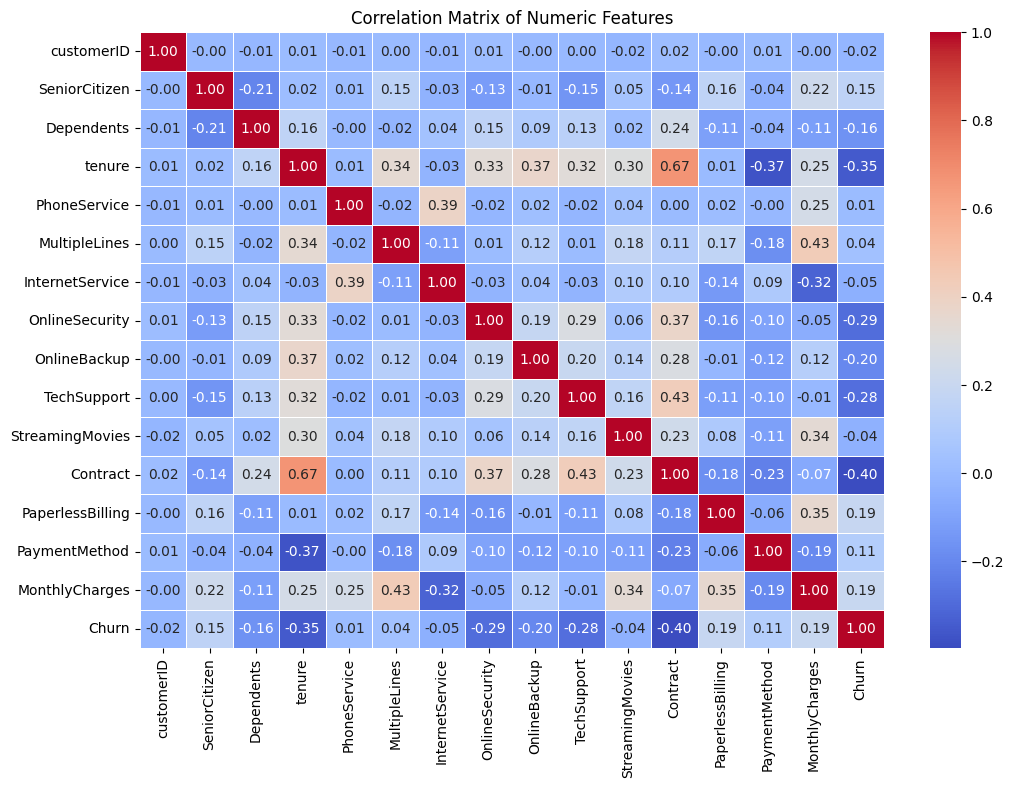

In [20]:
# Select only numeric columns for the correlation matrix
import numpy as np
numeric_data_cleaned = data_cleaned.select_dtypes(include=[np.number])

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the correlation matrix with values annotated
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


Label Encoding


In [21]:
# Encode target labels into numeric values using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data_cleaned['Churn'])
X_encoded = pd.get_dummies(data_cleaned.drop(columns=['Churn']), drop_first=True)

# Dataset Splitting **bold text**

In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

In [23]:
# Function to plot confusion matrix and print class prediction stats
def plot_confusion_matrix_and_metrics(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    # Print performance metrics
    accuracy = accuracy_score(y_true, y_pred) * 100
    precision = precision_score(y_true, y_pred, average='weighted') * 100
    recall = recall_score(y_true, y_pred, average='weighted') * 100
    f1 = f1_score(y_true, y_pred, average='weighted') * 100

    print(f"{model_name} Performance Metrics:")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"F1 Score: {f1:.2f}%")

    # Print correctly predicted vs total true for each class
    print("\nCorrectly Predicted vs Total True by Class:")
    for i, class_name in enumerate(label_encoder.classes_):
        correct_preds = cm[i, i]
        total_true = sum(cm[i, :])
        print(f"{class_name}: {correct_preds}/{total_true}")
    print("\n")

In [24]:
# Dictionary to store model performance metrics and best hyperparameters
model_performance_details = {}

In [25]:


models = {
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
        'param_grid': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'param_grid': {
            'n_estimators': [50, 100, 150],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'k-NN': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }


}



Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:13:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:13:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:13:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:13:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:13:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


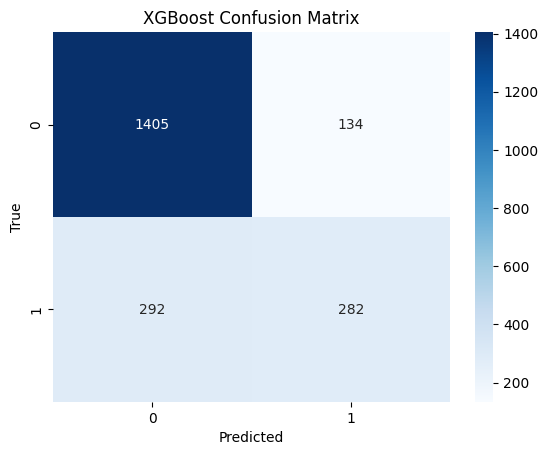

XGBoost Performance Metrics:
Accuracy: 79.84%
Precision: 78.72%
Recall: 79.84%
F1 Score: 78.72%

Correctly Predicted vs Total True by Class:
0: 1405/1539
1: 282/574



Training Random Forest...
Random Forest Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


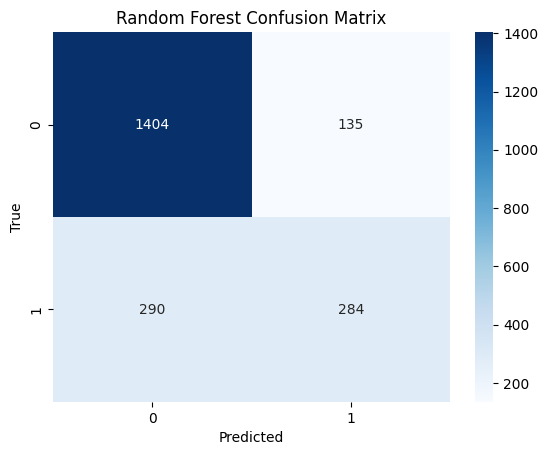

Random Forest Performance Metrics:
Accuracy: 79.89%
Precision: 78.78%
Recall: 79.89%
F1 Score: 78.80%

Correctly Predicted vs Total True by Class:
0: 1404/1539
1: 284/574



Training k-NN...


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


k-NN Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


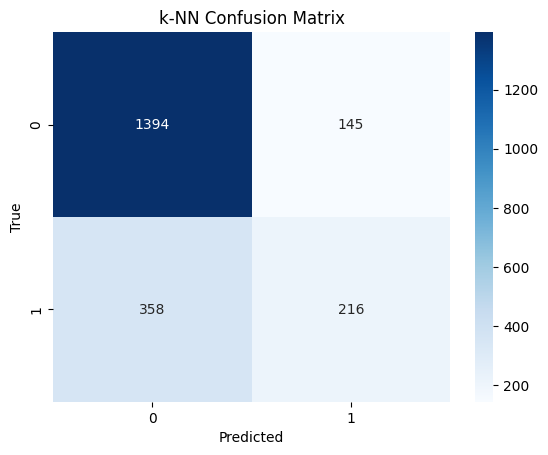

k-NN Performance Metrics:
Accuracy: 76.19%
Precision: 74.21%
Recall: 76.19%
F1 Score: 74.25%

Correctly Predicted vs Total True by Class:
0: 1394/1539
1: 216/574



Training Decision Tree...
Decision Tree Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


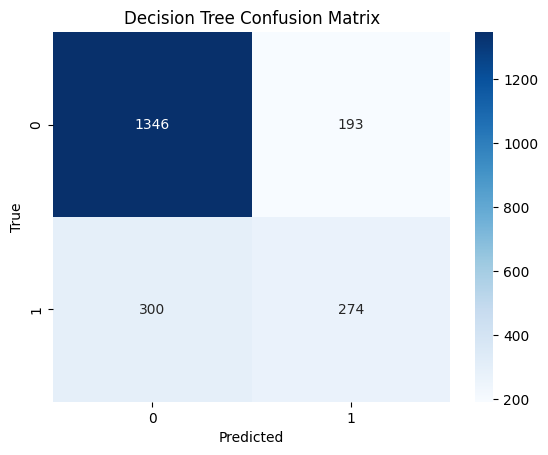

Decision Tree Performance Metrics:
Accuracy: 76.67%
Precision: 75.50%
Recall: 76.67%
F1 Score: 75.86%

Correctly Predicted vs Total True by Class:
0: 1346/1539
1: 274/574




In [26]:
# Iterate through models, apply cross-validation, hyperparameter tuning, and collect performance metrics
for model_name, config in models.items():
    print(f"\nTraining {model_name}...")
    grid_search = GridSearchCV(config['model'], config['param_grid'], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    y_pred = best_model.predict(X_test)

    # Cross-validation on the best model
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
    cv_mean_accuracy = np.mean(cv_scores) * 100

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred, average='weighted') * 100
    recall = recall_score(y_test, y_pred, average='weighted') * 100
    f1 = f1_score(y_test, y_pred, average='weighted') * 100

    # Store metrics and best hyperparameters
    model_performance_details[model_name] = {
        'Best Hyperparameters': best_params,
        'Cross-Validated Accuracy': cv_mean_accuracy,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    print(f"{model_name} Best Parameters: {best_params}")
    plot_confusion_matrix_and_metrics(model_name, y_test, y_pred)

In [27]:
# Display the results
print("\nModel Performance and Best Hyperparameters:")
for model_name, metrics in model_performance_details.items():
    print(f"\n{model_name}:")
    print(f"  Best Hyperparameters: {metrics['Best Hyperparameters']}")
    print(f"  Cross-Validated Accuracy: {metrics['Cross-Validated Accuracy']:.2f}%")
    print(f"  Accuracy: {metrics['Accuracy']:.2f}%")
    print(f"  Precision: {metrics['Precision']:.2f}%")
    print(f"  Recall: {metrics['Recall']:.2f}%")
    print(f"  F1 Score: {metrics['F1 Score']:.2f}%")


Model Performance and Best Hyperparameters:

XGBoost:
  Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
  Cross-Validated Accuracy: 80.37%
  Accuracy: 79.84%
  Precision: 78.72%
  Recall: 79.84%
  F1 Score: 78.72%

Random Forest:
  Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
  Cross-Validated Accuracy: 80.45%
  Accuracy: 79.89%
  Precision: 78.78%
  Recall: 79.89%
  F1 Score: 78.80%

k-NN:
  Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
  Cross-Validated Accuracy: 74.71%
  Accuracy: 76.19%
  Precision: 74.21%
  Recall: 76.19%
  F1 Score: 74.25%

Decision Tree:
  Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
  Cross-Validated Accuracy: 76.61%
  Accuracy: 76.67%
  Precision: 75.50%
  Recall: 76.67%
  F1 Score: 75.86%


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Sample dataset (replace this with your actual dataset)
# df = pd.read_csv("your_dataset.csv")
# X = df.drop(columns=["target"])
# y = df["target"]

# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Define individual classifiers
svm = SVC(probability=True, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
nb = GaussianNB()

# Create a Voting Classifier for hard voting
voting_classifier = VotingClassifier(estimators=[
    ('svm', svm),
    ('dt', dt),
    ('nb', nb)],
    voting='hard'  # Use 'hard' for hard voting
)

# Train the voting classifier
voting_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voting_classifier.predict(X_test)

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred) * 100

# Generate classification report and filter only for classes
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
results = pd.DataFrame(report).transpose()
results = results[results.index.isin(label_encoder.classes_)]  # Filter only class rows

# Calculate true and classified counts for each class
true_counts = [sum(y_test == label_encoder.transform([class_name])[0]) for class_name in label_encoder.classes_]
classified_counts = [sum(y_pred == label_encoder.transform([class_name])[0]) for class_name in label_encoder.classes_]

# Add counts to results DataFrame
results['n(truth)'] = true_counts
results['n(classified)'] = classified_counts

# Rename and reformat columns for final output
results.index.name = 'Class'
results.reset_index(inplace=True)
final_results = results[['Class', 'n(truth)', 'n(classified)', 'precision', 'recall', 'f1-score']].copy()
final_results.rename(columns={'precision': 'Prec.', 'recall': 'Recall', 'f1-score': 'F1 Score'}, inplace=True)

# Print the final results table
print(final_results.to_string(index=False))

# Print overall accuracy
print(f"\nOverall Accuracy: {overall_accuracy:.2f}%")


 Class  n(truth)  n(classified)    Prec.   Recall  F1 Score
     0      1539           1696 0.813090 0.896036  0.852550
     1       574            417 0.616307 0.447735  0.518668

Overall Accuracy: 77.43%
